In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [2]:
# Replace these variables accordingly 
path_to_results1 = "../experiments/2018-10-11-15-52_PowerM_/"
path_to_results2 = "../experiments/2018-10-11-16-35_PowerN_/"

In [3]:
data = pandas.read_csv(path_to_results1 + "PowerM.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [4]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [5]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [6]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]

/home/fouchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
selectedData1 = selectedData

In [8]:
data = pandas.read_csv(path_to_results2 + "PowerN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]

selectedData2 = selectedData

/home/fouchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Figure 5: Power of MWP w.r.t. n and M

<IPython.core.display.Javascript object>


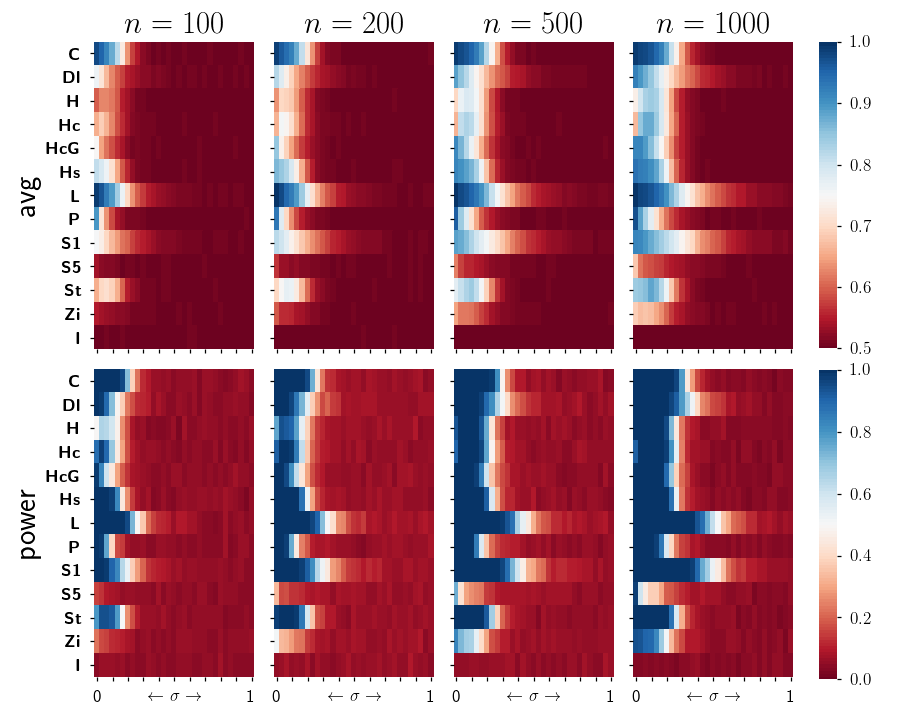

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [9]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"
measure = "avgContrast"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.5, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'$n = %s$'%(N))
    ax.set_ylabel("")

    ax.set_xlabel(r'')
    if i == 0:
        ax.set_ylabel(r'avg')
        
measure = "powerAt95"

for i, N in enumerate([100,200,500,1000]):
    subdata = selectedData2[(selectedData2["testId"] == test) & (selectedData2["n"] == N) & (selectedData2["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]
    
    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0.0, vmax=1.0,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)

    ax.set_title(r'')
    ax.set_ylabel("")
    
    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)

    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')

plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig5_1.pdf")

<IPython.core.display.Javascript object>


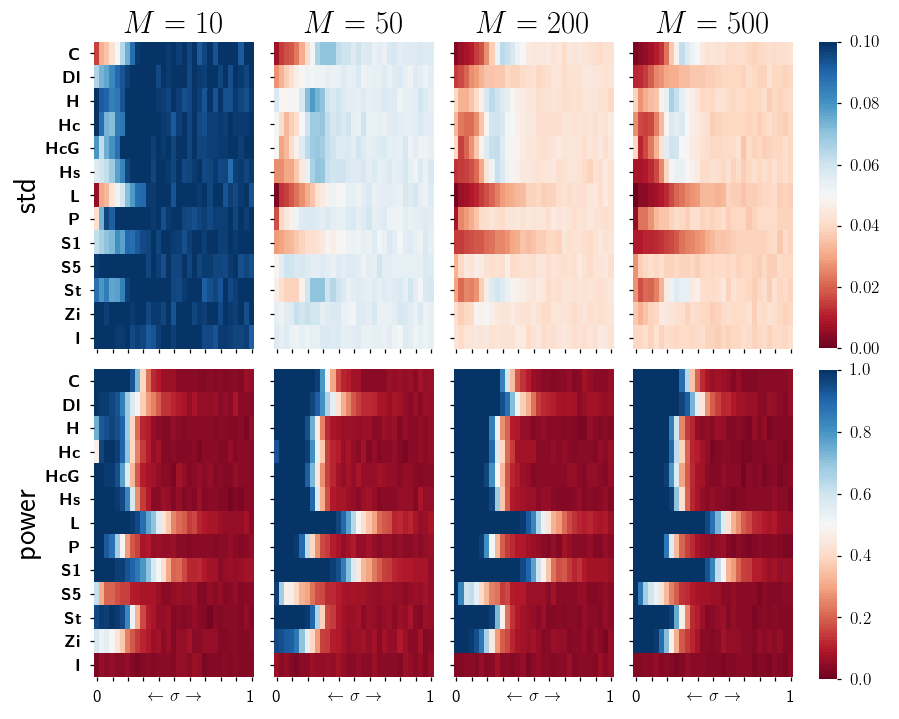

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [10]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,8), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax1 = fig.add_axes([.91, 0.515, .02, 0.425])
cbar_ax2 = fig.add_axes([.91, 0.055, .02, 0.43])
test = "MWP"



measure = "stdContrast"
for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=0.10,
                cbar=i == 0, cbar_ax=None if i else cbar_ax1)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'$M = %s$'%(M))

    ax.set_ylabel("")
    labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    ax.set_xticklabels(labels)
    if i == 0:
        ax.set_ylabel(r'std')
    ax.set_xlabel(r'')

                         
measure = "powerAt95"

for i, M in enumerate([10,50,200,500]):
    subdata = selectedData1[(selectedData1["testId"] == test) & (selectedData1["M"] == M) & (selectedData1["nDim"] == 3)]
    d = subdata.groupby(["noise","category"]).mean()[measure].reset_index()
    dd = d.set_index(["noise", "category"]).unstack("noise")
    dd.columns = dd.columns.droplevel(0)
    dd = dd.reindex(['C', "Dl", "H", "Hc", "HcG", 'Hs', 'L', 'P', 'S1', "S5", "St", "Zi", 'I'])

    ax = axess[i+4]

    sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), ax = ax, 
                xticklabels=3, vmin=0, vmax=1,
                cbar=i == 0, cbar_ax=None if i else cbar_ax2)

    ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
    
    ax.set_title(r'')

    ax.set_ylabel("")

    labels = ["" for x in ax.get_xticklabels()]
    labels[0] = "0"
    labels[-1] = "1"
    for x in range(1, len(labels), 2):
        labels[x] = ""
    labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
    ax.set_xticklabels(labels)
    ax.set_xlabel('')
    
    if i == 0:
        ax.set_ylabel(r'power')
    
plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig5_2.pdf")